In [1]:

import SimpleITK as sitk
import matplotlib.pyplot  as plt
import matplotlib.image as img
from scipy.interpolate import griddata
import numpy as np




In [4]:


def nonlinear_filter(Image,iteration = 5, K = 30, L = 0.2):


    # Image : input Image
    # iteration: Times of Iteration
    
    # Ori_Img = image

    # halt
    sz = Image.shape
    DIM = len(sz)
    if DIM == 2:
        print(" DIM = 2 \n size = " + str(sz))
        # --------------------------------------------------------------
        O_Image = np.zeros([sz[0]+2,sz[1]+2])

        for t in range(iteration):
            N_Image = O_Image.copy()
            S_Image = O_Image.copy()
            E_Image = O_Image.copy()
            W_Image = O_Image.copy()

            O_Image[1:sz[0]+1,1:sz[1]+1] = Image
            N_Image[1:sz[0]+1,2:sz[1]+2] = Image
            S_Image[1:sz[0]+1,0:sz[1]  ] = Image
            E_Image[2:sz[0]+2,1:sz[1]+1] = Image
            W_Image[0:sz[0]  ,1:sz[1]+1] = Image

            N_Image = N_Image - O_Image; C_N_Image = np.exp(-N_Image*N_Image/K/K)
            S_Image = O_Image - S_Image; C_S_Image = np.exp(-S_Image*S_Image/K/K)
            E_Image = E_Image - O_Image; C_E_Image = np.exp(-E_Image*E_Image/K/K)
            W_Image = O_Image - W_Image; C_W_Image = np.exp(-W_Image*W_Image/K/K)
            
            # print(A)
            # print("hhhh")
            O_Image = O_Image + L*(N_Image*C_N_Image + S_Image*C_S_Image + E_Image*C_E_Image+ W_Image*C_W_Image )

        return O_Image[1:sz[0]+1,1:sz[1]+1]

    elif DIM == 3:
        
        O_Image = np.zeros([sz[0]+2,sz[1]+2,sz[2]+2])
        for t in range(iteration):

            N_Image = O_Image.copy()
            S_Image = O_Image.copy()
            E_Image = O_Image.copy()
            W_Image = O_Image.copy()
            I_Image = O_Image.copy()
            B_Image = O_Image.copy()

            O_Image[1:sz[0]+1,1:sz[1]+1,1:sz[2]+1] = Image
            N_Image[1:sz[0]+1,2:sz[1]+2,1:sz[2]+1] = Image
            S_Image[1:sz[0]+1,0:sz[1]  ,1:sz[2]+1] = Image
            E_Image[2:sz[0]+2,1:sz[1]+1,1:sz[2]+1] = Image
            W_Image[0:sz[0]  ,1:sz[1]+1,1:sz[2]+1] = Image
            I_Image[1:sz[0]+1,1:sz[1]+1,2:sz[2]+2] = Image
            B_Image[1:sz[0]+1,1:sz[1]+1,0:sz[2]  ] = Image

            N_Image = N_Image - O_Image; C_N_Image = np.exp(-N_Image*N_Image/K/K)
            S_Image = O_Image - S_Image; C_S_Image = np.exp(-S_Image*S_Image/K/K)
            E_Image = E_Image - O_Image; C_E_Image = np.exp(-E_Image*E_Image/K/K)
            W_Image = O_Image - W_Image; C_W_Image = np.exp(-W_Image*W_Image/K/K)
            I_Image = I_Image - O_Image; C_I_Image = np.exp(-I_Image*I_Image/K/K)
            B_Image = O_Image - B_Image; C_B_Image = np.exp(-B_Image*B_Image/K/K)

            O_Image = O_Image + L*(N_Image*C_N_Image + S_Image*C_S_Image + E_Image*C_E_Image+ W_Image*C_W_Image + I_Image*C_I_Image + B_Image*C_B_Image)

        return O_Image[1:sz[0]+1,1:sz[1]+1,1:sz[2]+1]

    else:
        print('Wrong dimension of image')
        return

In [12]:
def reslice (Ori_Image,x = [1,0,0],y = [0,1,0],z = [0,0,1]):
    x = x/np.linalg.norm(x)
    y = y/np.linalg.norm(y)
    z = z/np.linalg.norm(z)
    size_of_image = Ori_Image.shape

    # Three Matrix to store transfered indexs of coordinate
    Coor_Matrix = np.zeros([3,size_of_image[0],size_of_image[1],size_of_image[2]])

    norm_X = np.linalg.norm(x)
    norm_Y = np.linalg.norm(y)
    norm_Z = np.linalg.norm(z)
    print('finish one ')
#     for i in range(size_of_image[0]):
#         for j in range(size_of_image[1]):
#             for k in range(size_of_image[2]):
#                 Coor_Matrix[0,i,j,k] = np.dot([i,j,k],x)/norm_X
#                 Coor_Matrix[1,i,j,k] = np.dot([i,j,k],y)/norm_Y
#                 Coor_Matrix[2,i,j,k] = np.dot([i,j,k],z)/norm_Z

                
    # faster method to calculate reslice coordinate

    # caiculate a row then expend to one plane
    for i in range (2):
        for k in range(size_of_image[2]):

            Coor_Matrix[0,i,0,k] = np.dot([i,0,k],x)/norm_X
            Coor_Matrix[1,i,0,k] = np.dot([i,0,k],y)/norm_Y
            Coor_Matrix[2,i,0,k] = np.dot([i,0,k],z)/norm_Z

            Coor_Matrix[0,i,1,k] = np.dot([i,1,k],x)/norm_X
            Coor_Matrix[1,i,1,k] = np.dot([i,1,k],y)/norm_Y
            Coor_Matrix[2,i,1,k] = np.dot([i,1,k],z)/norm_Z

        G_X = Coor_Matrix[0,i,1,:] - Coor_Matrix[0,i,0,:]
        G_Y = Coor_Matrix[1,i,1,:] - Coor_Matrix[1,i,0,:]
        G_Z = Coor_Matrix[2,i,1,:] - Coor_Matrix[2,i,0,:]

        for j in range(2,size_of_image[1]):
            Coor_Matrix[0,i,j,:] = Coor_Matrix[0,i,0,:] + G_X * j
            Coor_Matrix[1,i,j,:] = Coor_Matrix[1,i,0,:] + G_Y * j
            Coor_Matrix[2,i,j,:] = Coor_Matrix[2,i,0,:] + G_Z * j
    
    # calculate a plane then expand to a volume
    G_X = Coor_Matrix[0,1,:,:] - Coor_Matrix[0,0,:,:]
    G_Y = Coor_Matrix[1,1,:,:] - Coor_Matrix[1,0,:,:]
    G_Z = Coor_Matrix[2,1,:,:] - Coor_Matrix[2,0,:,:]
    
    for i in range (2,size_of_image[0]):
        Coor_Matrix[0,i,:,:] = Coor_Matrix[0,0,:,:] + G_X * i
        Coor_Matrix[1,i,:,:] = Coor_Matrix[1,0,:,:] + G_Y * i
        Coor_Matrix[2,i,:,:] = Coor_Matrix[2,0,:,:] + G_Z * i

    
        
        
    

    print('finish two ')
    # create output image
    range_of_coor = np.zeros([3,2])
    Coor_Matrix = np.round(Coor_Matrix)
    range_of_coor[0,0] = np.max(Coor_Matrix[0,:,:,:]);range_of_coor[0,1] = np.min(Coor_Matrix[0,:,:,:])
    range_of_coor[1,0] = np.max(Coor_Matrix[1,:,:,:]);range_of_coor[1,1] = np.min(Coor_Matrix[1,:,:,:])
    range_of_coor[2,0] = np.max(Coor_Matrix[2,:,:,:]);range_of_coor[2,1] = np.min(Coor_Matrix[2,:,:,:])
    Range_Cor = []
    Range_Cor.append(np.int16(range_of_coor[0,0] - range_of_coor[0,1]))
    Range_Cor.append(np.int16(range_of_coor[1,0] - range_of_coor[1,1]))
    Range_Cor.append(np.int16(range_of_coor[2,0] - range_of_coor[2,1]))
    Range_Cor = np.array(Range_Cor)

    Coor_Matrix[0,:,:,:] = Coor_Matrix[0,:,:,:] - range_of_coor[0,1]
    Coor_Matrix[1,:,:,:] = Coor_Matrix[1,:,:,:] - range_of_coor[1,1]
    Coor_Matrix[2,:,:,:] = Coor_Matrix[2,:,:,:] - range_of_coor[2,1]

    # calculate output

    C_X = np.reshape(Coor_Matrix[0,:,:,:],-1)
    C_Y = np.reshape(Coor_Matrix[1,:,:,:],-1)
    C_Z = np.reshape(Coor_Matrix[2,:,:,:],-1)
    Value = np.reshape(Ori_Image,-1)
    

    output = np.zeros([Range_Cor[0]+1,Range_Cor[1]+1,Range_Cor[2]+1])
    y1 = np.linspace(0,Range_Cor[1],Range_Cor[1]+1)
    z1 = np.linspace(0,Range_Cor[2],Range_Cor[2]+1)
    mesh_y, mesh_z  = np.meshgrid(y1,z1,indexing='ij')

    for i in range(Range_Cor[0]):

        Index = np.array(np.where(C_X == i))
        Y = C_Y[Index]
        Z = C_Z[Index]
        point = np.transpose(np.squeeze(np.array([Y,Z])))
        V = np.transpose(Value[Index])
        interp = griddata(point, V ,(mesh_y,mesh_z) ,method='linear')
        output[i,:,:] = np.squeeze(np.array(interp))
        # print(i)

    



    return output



Path_of_image = './0001_image.nii'
Path_of_label = './0001_mask.nii'

# Read Image Data
data = sitk.ReadImage(Path_of_image )
array_of_data = sitk.GetArrayFromImage(data)
Slice = 100
# Reslice Part
# Resliced_image = reslice(array_of_data[Slice,:,:],x = [0,2], y = [2,0])
Resliced_image = reslice(array_of_data,[1,1,0],[0,1,0],[0,0,1])
# np.save('Resliced_image', Resliced_image)


plt.subplot(1, 2, 1)
plt.imshow(array_of_data[Slice,:,:])
plt.xlabel('X')
plt.ylabel('Y')
print(Resliced_image.shape)
plt.subplot(1, 2, 2)
plt.imshow(Resliced_image[Slice,:,:])
plt.show()


finish one 
finish two 


QhullError: QH6013 qhull input error: input is less than 3-dimensional since all points have the same x coordinate    0

While executing:  | qhull d Qc Q12 Qbb Qz Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1180789986  delaunay  Qcoplanar-keep  Q12-allow-wide  Qbbound-last
  Qz-infinity-point  Qtriangulate  _pre-merge  _zero-centrum  Qinterior-keep
  Pgood  _max-width 1.9e+02  Error-roundoff 2.6e-13  _one-merge 1.9e-12
  Visible-distance 5.3e-13  U-max-coplanar 5.3e-13  Width-outside 1.1e-12
  _wide-facet 3.2e-12  _maxoutside 2.1e-12


(256, 248, 248)


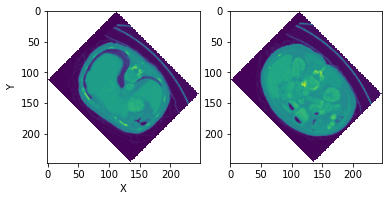

In [11]:
plt.subplot(1, 2, 1)
plt.imshow(Resliced_image[200,:,:])
plt.xlabel('X')
plt.ylabel('Y')
print(Resliced_image.shape)
plt.subplot(1, 2, 2)
plt.imshow(Resliced_image[150,:,:])
plt.show()

In [ ]:
# 插值部分
    def warp(self,affine):

        self.matrix = affine.trans
        
        Result = np.dot(self.matrix, self.Coordinate_Matrix)
        # Value_result = np.transpose(Result)
        Result[3,:] = self.Value_Matrix[3,:]

        print(' finish Calculating Matrix')
        sz_Result = Result.shape
        Max = np.max(Result,1)
        Min = np.min(Result,1)
        # ------------------ +- ------------------------
        Result[0,:] = Result[0,:] - Min[0]
        Result[1,:] = Result[1,:] - Min[1]
        Result[2,:] = Result[2,:] - Min[2]

        Max = np.max(Result,1)
        Min = np.min(Result,1)
        Range = np.int16(Max)-np.int16(Min)

        # --------------------- test4 ----------------------

        x = Result[0,:].reshape(self.sz)
        y = Result[1,:].reshape(self.sz)
        z = Result[2,:].reshape(self.sz)
        v = Result[3,:].reshape(self.sz)
        x_max = np.max(Result[0,:]); x_min = np.min(Result[0,:])
        y_max = np.max(Result[1,:]); y_min = np.min(Result[1,:])
        z_max = np.max(Result[2,:]); z_min = np.min(Result[2,:])
        
        x1 = np.linspace(x_min,(x_max),np.int16(x_max-x_min)+1)
        y1 = np.linspace((y_min),(y_max),np.int16(y_max-y_min)+1)
        X, Y  = np.meshgrid(x1,y1)
        print(len(x1))
        sz = x.shape
        output = np.zeros(np.int16([sz[0],len(y1),len(x1)]))
        for A in range(sz[0]):
            Output_x = x[A,:,:].reshape(-1)
            Output_y = y[A,:,:].reshape(-1)
            Output_v = v[A,:,:].reshape(-1)     
            # z = np.linspace((z_min),(z_max),np.int16(z_max-z_min)+1)
            # [X, Y ,Z] = np.meshgrid(x,y,z)
            
            # pix_coords = np.array([np.reshape(X, -1) ,np.reshape(Y ,-1),np.reshape(Z ,-1)]).T
            pix_coords = np.array([np.reshape(X, -1) ,np.reshape(Y ,-1)]).T
            point = np.array([Output_x,Output_y]).T
            B = np.squeeze(np.array([X,Y])).T
            interp = griddata(point, (Output_v) ,(X,Y) ,method='linear')
            # print(interp.shape)
            output[A,:,:] = np.array(interp) # Z Y X
            # print('finish one slice')
        output[np.isnan(output)] = 0
        for A in range(1,sz[0]-1):
            output[A,:,:] = output[A-1,:,:]/6 + output[A,:,:]/6 + output[A,:,:] * 4 /6